In [13]:
import numpy as np
import pandas as pd
import sys
!{sys.executable} -m pip install --user netCDF4



In [14]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import torch
import matplotlib.animation as animation

ModuleNotFoundError: No module named 'netCDF4'

In [2]:
nc = Dataset('/project/projectdirs/dasrepo/mustafa/datasets/Rayleigh_Benard/result_rb_2d__Ra_2.5e8__Pr_0.71__maxMach_0.1__t_D_max_diffusive_scaling__0.4.nc')
#/project/projectdirs/dasrepo/mustafa/data/result_rb_2d__Ra_2.5e8__Pr_0.71__maxMach_0.1__t_D_max_diffusive_scaling__0.4.nc

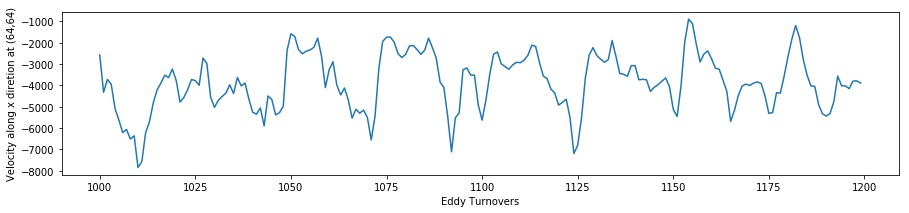

In [14]:
fig=plt.figure(figsize=(15, 3))
plt.plot(list(range(1000,1200)), Us)
plt.xlabel("Eddy Turnovers")
plt.ylabel("Velocity along x diretion at (64,64)")
plt.savefig("timeseries2.png", dpi = 400)
plt.show()

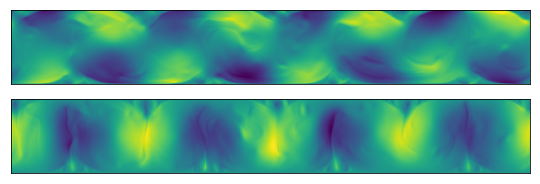

In [19]:
#Snapshot
u = ux_data[1000].filled()
v = uy_data[1000].filled()
fig=plt.figure(figsize=(10, 3))
fig.add_subplot(2, 1, 1)
plt.imshow(u)
plt.xticks([])
plt.yticks([])
fig.add_subplot(2, 1, 2)
plt.imshow(v)
plt.xticks([])
plt.yticks([])
plt.savefig("snapshots_uv.png", dpi = 400)

In [10]:
ux_data = nc['u_x']
uy_data = nc['u_y']
raw_ux = ux_data[1000:1500]
raw_uy = uy_data[1000:1500]
TB_data = []
for i in range(raw_ux.shape[0]):
    x = np.array([raw_ux[i].filled()[j*64:(j+1)*64,k*64:(k+1)*64] for j in range(4) for k in range(28)])
    y = np.array([raw_uy[i].filled()[j*64:(j+1)*64,k*64:(k+1)*64] for j in range(4) for k in range(28)])
    temp = np.array([x,y])
    TB_data.append(temp) 
#num_subregions * time * channels * w * h
Data = np.float32(np.array(TB_data)).transpose(2,0,1,3,4)
np.save("TB_data_xy.npy", Data)

In [3]:
#num_subregions * time * w * h
Data = np.load("TB_data_xy.npy")

In [1]:

import numpy as np
Data = np.random.normal(loc = 0, scale = 1, size = (112,500,2,64,64))

Data.shape

(112, 500, 2, 64, 64)

In [5]:
112/4

28.0

In [5]:
# Dimensionless
length = 90
# Nt = 1/nc['time'][1].filled() 
Nt = 1e5
Ny = 256
scale = Ny/Nt
#0.026/64
seqs = []
for j in range(100, 170, 1):
    for i in range(Data.shape[0]):
        seqs.append(Data[i, j -30 : j + 60])
#         print(seqs[0].shape)
    
#del Data
seqs = np.array(seqs)
print(seqs.shape)
train_seqs = torch.FloatTensor(seqs*scale)
torch.save(train_seqs, "train_seqs.pt")
del train_seqs

seqs = []
for j in range(170, 190, 1):
    for i in range(Data.shape[0]):
        seqs.append(Data[i, j -30 : j + 60])
#del Data
seqs = np.array(seqs)
test_seqs = torch.FloatTensor(seqs*scale)
torch.save(test_seqs, "test_seqs.pt")

(7840, 90, 2, 64, 64)


NameError: name 'torch' is not defined

In [4]:
# standarization
length = 90
seqs = []
for j in range(100, 170, 1):
    for i in range(Data.shape[0]):
        seqs.append(Data[i, j -30 : j + 60])
#del Data
seqs = np.array(seqs)
avg = 6.3198566
stds = 4486.206
train_seqs = torch.FloatTensor((seqs - avg)/stds)
torch.save(train_seqs, "train_seqs.pt")
del train_seqs

seqs = []
for j in range(170, 190, 1):
    for i in range(Data.shape[0]):
        seqs.append(Data[i, j -30 : j + 60])
#del Data
seqs = np.array(seqs)
avg = 6.3198566
stds = 4486.206
test_seqs = torch.FloatTensor((seqs - avg)/stds)
torch.save(test_seqs, "test_seqs.pt")

In [3]:
data = Data.transpose(1,2,0,3,4)[70:250]
w = np.zeros((180, 2, 256, 1792))
for i in range(28):
    for j in range(4):
        w[:,:, j*64:(j+1)*64, i*64:(i+1)*64] = data[:, :, j*28 + i]

In [10]:
data_w = np.zeros((2, 180, 64*64, 4))
for d in range(2):
    for t in range(w.shape[0]):   
        for i in range(64):
            for j in range(64):
                data_w[d, t, i*64+j] = np.array([i,j,t,w[t, d, i, j]])
                #+1070

In [12]:
avg = 6.3198566
stds = 4486.206
data_w[:,:,:,-1] = (data_w[:,:,:,-1] - avg)/stds
#data_w[:,:,:,-2] = (data_w[:,:,:,-2] - np.mean(data_w[:,:,:,-2]))/np.std(data_w[:,:,:,-2])
#data_w[:,:,:,-3] = (data_w[:,:,:,-3] - np.mean(data_w[:,:,:,-3]))/np.std(data_w[:,:,:,-3])
#data_w[:,:,:,-4] = (data_w[:,:,:,-4] - np.mean(data_w[:,:,:,-4]))/np.std(data_w[:,:,:,-4])
train_points = torch.FloatTensor(data_w[:,:100])
torch.save(train_points, "train_points.pt")
test_points = torch.FloatTensor(data_w[:,100:])
torch.save(test_points, "test_points.pt")

In [ ]:
U = nc['u_x'][5000:10000]
V = nc['u_y'][5000:10000]
U = np.array([U[i].filled() for i in range(5000)])
V = np.array([V[i].filled() for i in range(5000)])
prop_u = []
prop_v = []
for i in range(100, 5000):
    avg_u = np.mean(U[i-20:i], axis = 0)
    avg_v = np.mean(V[i-20:i], axis = 0)
    if np.all(avg_u) and np.all(avg_v):
        prop_u.append(np.mean(np.abs((U[i] - U[i-1])/avg_u)))
        prop_v.append(np.mean(np.abs((V[i] - V[i-1])/avg_v)))
np.mean(prop_u)